In [19]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy
import matplotlib.pyplot as plt
from pathlib import Path
from read_data import get_network_df, get_corrs, get_full_df
from numba.core import types
import graph_tool
import numba
from numba import njit
from graph_tool.topology import shortest_distance
import pandas as pd
import networkx as nx
import graph_tool as gt
from graph_tool.topology import shortest_distance
import numpy as np
import typing

import numba
from numba.core import types

from transport_problem import OptimParams, DualOracle, HyperParams
from subgd import OracleStacker, ustm_mincost_mcf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
T_LEN = 76
LA_LEN = 25
MU_LEN = 25

In [21]:
net_df = get_network_df(Path('SiouxFalls') / 'SiouxFalls_net.tntp')
corrs = get_corrs(Path('SiouxFalls') / 'SiouxFalls_trips.tntp') / 2

graph = graph_tool.Graph(net_df.values, eprops=[('capacity', 'double'), ('fft', 'double')])

In [22]:
from transport_problem import HyperParams, DualOracle, OptimParams 
l = np.sum(corrs, axis=1)
w = np.sum(corrs, axis=0)

zones_num = len(l)
sources = np.arange(zones_num)
targets = np.arange(zones_num)

params = HyperParams(gamma=10, mu_pow=0.25, rho=0.15)
oracle = DualOracle(graph, net_df, l, w, params)

In [23]:
oracle_stacker = OracleStacker(oracle, graph, sources, targets)

In [24]:
t, flows_averaged, dgap_log, cons_log, A_log, hist = ustm_mincost_mcf(oracle_stacker, 1e-2, None, 1000, None)

start optimizing


100%|██████████| 1000/1000 [00:20<00:00, 47.65it/s]


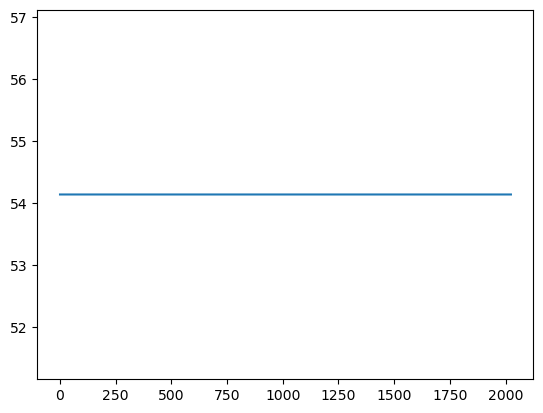

In [25]:
import matplotlib.pyplot as plt
plt.plot(hist)

In [ ]:
graph = None # TODO создавать граф
oracle = None # TODO - создать оракла
sources, targets = None, None    # определять sources и targets
oracle_stacker = OracleStacker(oracle, graph, sources, targets)
